In [1]:
import numpy as np
import pandas
import random
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score, recall_score, precision_score
import yaml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [10]:
train_df=pd.read_csv(cfg['selary']['train_refactor'])
train_df.drop(['Unnamed: 0'], axis=1)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Credit_Score_0,Credit_Score_1,Credit_Score_2
0,3,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,23.0,12,19114.12,2557.736817,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,23.0,12,19114.12,2557.736817,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7,23.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,23.0,12,19114.12,2557.736817,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54831,6,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54832,0,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54833,7,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54834,4,25.0,9,39628.99,3359.415833,4,6,7,2.0,683,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
test_df=pd.read_csv(cfg['selary']['test_refactor'])
test_df.drop(['Unnamed: 0'], axis=1)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__
0,2,24.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,24.0,12,19114.12,1824.843333,3,4,3,4.0,128,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,24.0,12,19114.12,2530.276363,3,4,3,4.0,128,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,28.0,15,34847.84,3037.986667,2,4,6,1.0,684,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2,28.0,13,34847.84,3037.986667,2,4,6,1.0,684,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,2,29.0,1,20002.88,1929.906667,10,8,29,5.0,4913,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
26855,1,29.0,15,20002.88,1929.906667,10,8,29,5.0,4913,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
26856,3,25.0,9,39628.99,2530.276363,4,6,7,2.0,683,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26857,1,25.0,9,39628.99,2530.276363,4,6,7,2.0,683,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
X = train_df.drop(['Credit_Score_0','Credit_Score_1','Credit_Score_2'], axis=1)
y = np.argmax(train_df[['Credit_Score_0','Credit_Score_1','Credit_Score_2']], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=110)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=110)

In [32]:
tree.predict_proba(X_test)

array([[0.40738487, 0.56380605, 0.02880909],
       [0.15101178, 0.51585624, 0.33313198],
       [0.72716087, 0.26945555, 0.00338357],
       ...,
       [0.11432039, 0.37597087, 0.50970874],
       [0.11432039, 0.37597087, 0.50970874],
       [0.73948662, 0.25341344, 0.00709995]])

In [35]:
tree.score(X_test, y_test)  

0.7085156819839533

[Text(0.5020833333333333, 0.9166666666666666, 'x[15] <= 1485.53\ngini = 0.592\nsamples = 43868\nvalue = [14462.0, 23190.0, 6216.0]'),
 Text(0.26666666666666666, 0.75, 'x[32] <= 0.5\ngini = 0.534\nsamples = 26776\nvalue = [4018, 16820, 5938]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[8] <= 20.5\ngini = 0.399\nsamples = 18373\nvalue = [2681.0, 13868.0, 1824.0]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[33] <= 0.5\ngini = 0.353\nsamples = 17244\nvalue = [1783, 13637, 1824]'),
 Text(0.03333333333333333, 0.25, 'x[30] <= 0.5\ngini = 0.539\nsamples = 5540\nvalue = [893.0, 3453.0, 1194.0]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.6\nsamples = 3311\nvalue = [500.0, 1708.0, 1103.0]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.354\nsamples = 2229\nvalue = [393.0, 1745.0, 91.0]'),
 Text(0.1, 0.25, 'x[11] <= 35.5\ngini = 0.234\nsamples = 11704\nvalue = [890, 10184, 630]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.23\nsamples = 11664\nvalue =

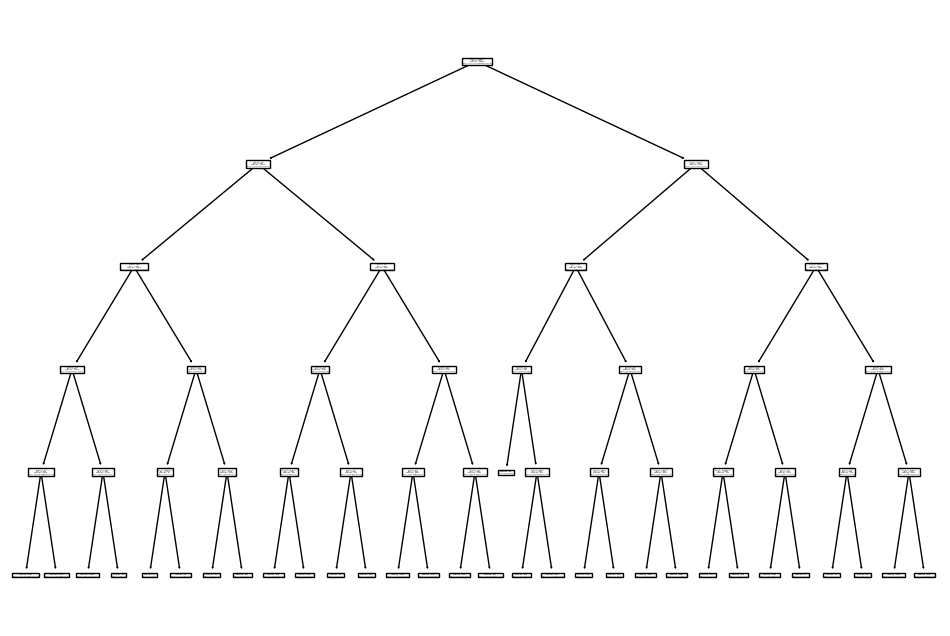

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
plot_tree(tree, ax=ax)